In [419]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
#machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [420]:
rawdata= pd.read_csv("/Users/cailayoung/Desktop/Final/fetal_health.csv")
rawdata

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [421]:
#I dont need any of these columns, I will be creating visualizations based off of
#relevant data. The values of their histogram do not help with the goal
#of predicting fetal health.
cleandata=rawdata.drop(["mean_value_of_short_term_variability","mean_value_of_long_term_variability", "histogram_min", "histogram_max",
                       "histogram_number_of_peaks", "histogram_number_of_zeroes", "histogram_mode",
                       "histogram_mean","histogram_median","histogram_variance",
                       "histogram_width", "histogram_tendency"], axis=1)
cleandata

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,43.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,25.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,22.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,20.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,27.0,2.0


In [422]:
#check data types
cleandata.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
percentage_of_time_with_abnormal_long_term_variability    float64
fetal_health                                              float64
dtype: object

In [423]:
#check for null values
cleandata.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
percentage_of_time_with_abnormal_long_term_variability    0
fetal_health                                              0
dtype: int64

In [424]:
cleandata.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,9.84666,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,18.39688,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.00000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,0.00000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,11.00000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,91.00000,3.000000


In [425]:
print(cleandata.var())
#data points for accelerations, fetal movement, uterine contractions,
#light, severe, and prolonged decelerations are all very close to
#the mean and to each other 

baseline value                                            9.684222e+01
accelerations                                             1.494279e-05
fetal_movement                                            2.177701e-03
uterine_contractions                                      8.679323e-06
light_decelerations                                       8.762835e-06
severe_decelerations                                      3.283272e-09
prolongued_decelerations                                  3.480381e-07
abnormal_short_term_variability                           2.955928e+02
percentage_of_time_with_abnormal_long_term_variability    3.384452e+02
fetal_health                                              3.774589e-01
dtype: float64


array([[<AxesSubplot:title={'center':'baseline value'}>]], dtype=object)

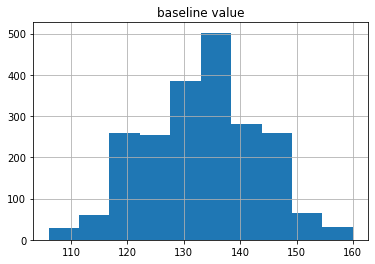

In [426]:
cleandata.hist(column="baseline value")
#normal distibution of baseline values

array([[<AxesSubplot:title={'center':'abnormal_short_term_variability'}>]],
      dtype=object)

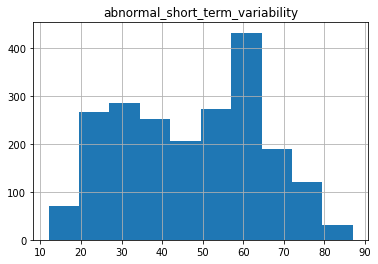

In [427]:
cleandata.hist(column="abnormal_short_term_variability")

array([[<AxesSubplot:title={'center':'percentage_of_time_with_abnormal_long_term_variability'}>]],
      dtype=object)

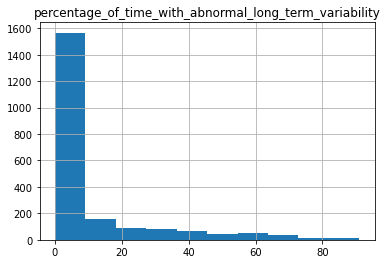

In [428]:
cleandata.hist(column="percentage_of_time_with_abnormal_long_term_variability")
#most fetuses had little to no time with abnormal long term variability

Text(0.5, 1.0, 'pearson correlation')

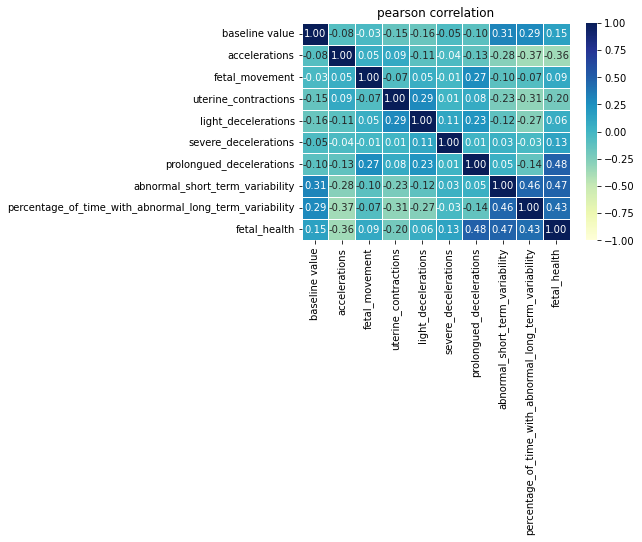

In [429]:
#looking at correlation between variables, specifically the correlation
#between values and "fetal_health"
corr_matrix = cleandata.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

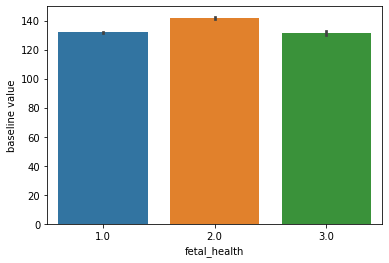

In [430]:
sns.barplot(x='fetal_health', y='baseline value', data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

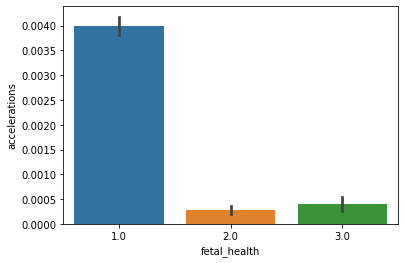

In [431]:
sns.barplot(x='fetal_health', y="accelerations", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='fetal_movement'>

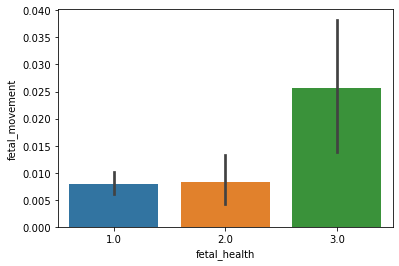

In [432]:
sns.barplot(x='fetal_health', y="fetal_movement", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='uterine_contractions'>

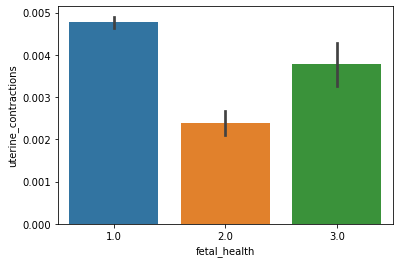

In [433]:
sns.barplot(x='fetal_health', y="uterine_contractions", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='light_decelerations'>

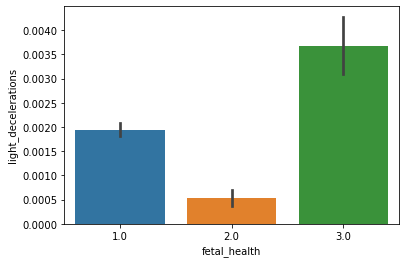

In [434]:
sns.barplot(x='fetal_health', y="light_decelerations", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='severe_decelerations'>

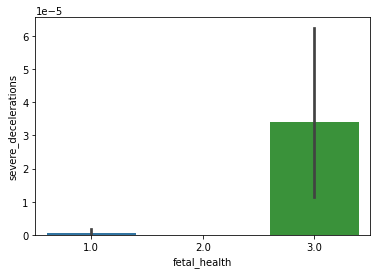

In [435]:
sns.barplot(x='fetal_health', y="severe_decelerations", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='prolongued_decelerations'>

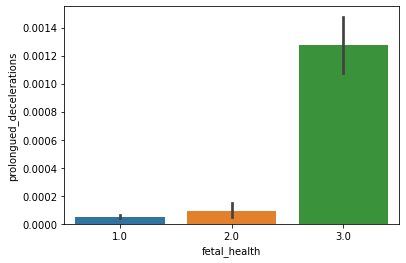

In [436]:
sns.barplot(x='fetal_health', y="prolongued_decelerations", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='percentage_of_time_with_abnormal_long_term_variability'>

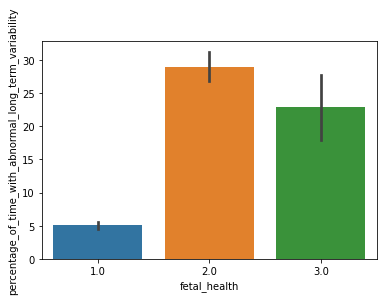

In [437]:
sns.barplot(x='fetal_health', y="percentage_of_time_with_abnormal_long_term_variability", data=cleandata)

<AxesSubplot:xlabel='fetal_health', ylabel='abnormal_short_term_variability'>

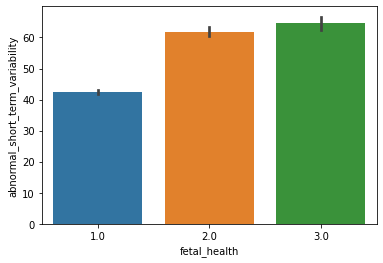

In [438]:
sns.barplot(x='fetal_health', y="abnormal_short_term_variability", data=cleandata)

In [439]:
#from these simple plots, it is clear that decelerations, movement, and abnormal variability have 
#a negative effect on fetal health.

In [506]:
#getting binary data, fetuses with 1 = true (they had decelerations/accelerations/movement/contractions)
#and fetuses with 0= false (there were no decelerations/accelerations/movement/contractions)
binarydata = cleandata.apply(np.ceil)
binarydata.astype(int)
#this will just make my visualizations more clear it will not be used to train.

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120,0,0,0,0,0,0,73,43,2
1,132,1,0,1,1,0,0,17,0,1
2,133,1,0,1,1,0,0,16,0,1
3,134,1,0,1,1,0,0,16,0,1
4,132,1,0,1,0,0,0,16,0,1
...,...,...,...,...,...,...,...,...,...,...
2121,140,0,0,1,0,0,0,79,25,2
2122,140,1,0,1,0,0,0,78,22,2
2123,140,1,0,1,0,0,0,79,20,2
2124,140,1,0,1,0,0,0,78,27,2


In [507]:
binarydata["decelerations"]= binarydata["light_decelerations"]+binarydata["severe_decelerations"]+binarydata["prolongued_decelerations"]
binarydata

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health,decelerations
0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,43.0,2.0,0.0
1,132.0,1.0,0.0,1.0,1.0,0.0,0.0,17.0,0.0,1.0,1.0
2,133.0,1.0,0.0,1.0,1.0,0.0,0.0,16.0,0.0,1.0,1.0
3,134.0,1.0,0.0,1.0,1.0,0.0,0.0,16.0,0.0,1.0,1.0
4,132.0,1.0,0.0,1.0,0.0,0.0,0.0,16.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.0,0.0,1.0,0.0,0.0,0.0,79.0,25.0,2.0,0.0
2122,140.0,1.0,0.0,1.0,0.0,0.0,0.0,78.0,22.0,2.0,0.0
2123,140.0,1.0,0.0,1.0,0.0,0.0,0.0,79.0,20.0,2.0,0.0
2124,140.0,1.0,0.0,1.0,0.0,0.0,0.0,78.0,27.0,2.0,0.0


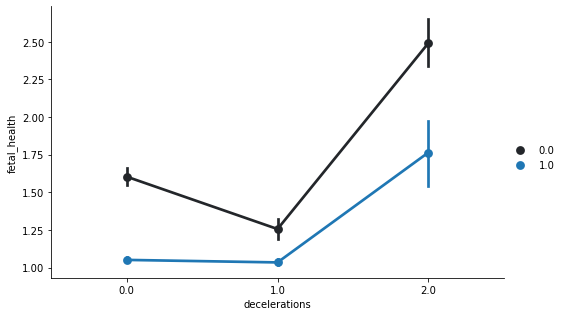

In [456]:
FacetGrid = sns.FacetGrid(binarydata, height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'decelerations', 'fetal_health','accelerations', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
#fetuses with accelerations were more healthy than those without
#fetuses with 2 decelerations (light, severe, or prolonged) are far less healthy thank those with 1 or none

/Users/cailayoung/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


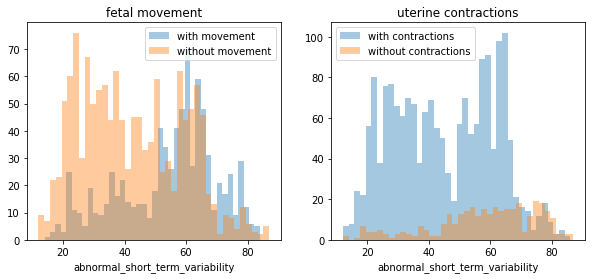

In [457]:
with_movement= "with movement"
without_movement= "without movement"
with_contractions= "with contractions"
without_contractions= "without contractions"
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

wmove = binarydata[binarydata['fetal_movement']== 1]
womove = binarydata[binarydata['fetal_movement']== 0]
wcont= binarydata[binarydata['uterine_contractions']== 1]
wocont= binarydata[binarydata['uterine_contractions']== 0]

ax = sns.distplot(wmove.abnormal_short_term_variability, bins=40, label = with_movement, ax = axes[0], kde =False)
ax = sns.distplot(womove.abnormal_short_term_variability, bins=40, label = without_movement, ax = axes[0], kde =False)
ax.legend()
ax.set_title('fetal movement')

ax = sns.distplot(wcont.abnormal_short_term_variability, bins=40, label = with_contractions, ax = axes[1], kde = False)
ax = sns.distplot(wocont.abnormal_short_term_variability, bins=40, label = without_contractions, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('uterine contractions')
#of fetuses that experienced movement, most of them had short term variability around 60
#of those that did not, most of them had short term variability between 20 and 40
#most fetuses experienced contractions, those that did not report higher short term variability(60-80)

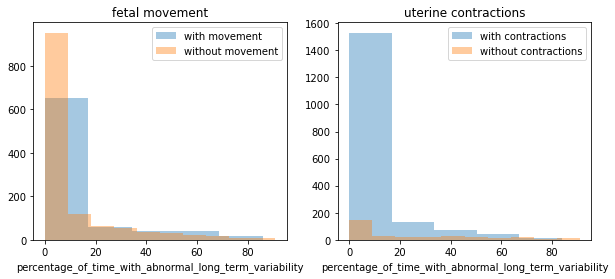

In [458]:
with_movement= "with movement"
without_movement= "without movement"
with_contractions= "with contractions"
without_contractions= "without contractions"
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

wmove = binarydata[binarydata['fetal_movement']== 1]
womove = binarydata[binarydata['fetal_movement']== 0]
wcont= binarydata[binarydata['uterine_contractions']== 1]
wocont= binarydata[binarydata['uterine_contractions']== 0]

ax = sns.distplot(wmove.percentage_of_time_with_abnormal_long_term_variability, bins=5, label = with_movement, ax = axes[0], kde =False)
ax = sns.distplot(womove.percentage_of_time_with_abnormal_long_term_variability, bins=10, label = without_movement, ax = axes[0], kde =False)
ax.legend()
ax.set_title('fetal movement')

ax = sns.distplot(wcont.percentage_of_time_with_abnormal_long_term_variability, bins=5, label = with_contractions, ax = axes[1], kde = False)
ax = sns.distplot(wocont.percentage_of_time_with_abnormal_long_term_variability, bins=10, label = without_contractions, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('uterine contractions')
#trends between fetus movement and contractions are similar.
#most experienced contractions and movement, and even those that did not, most reported low percent of time in long term variability.
 


In [594]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cleandata, test_size=0.2)

In [460]:
test.shape

(426, 10)

In [461]:
train.shape

(1700, 10)

In [462]:
X_train = train.drop("fetal_health", axis=1)
Y_train = train["fetal_health"]
X_test  = test.drop("fetal_health", axis=1).copy()

In [463]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


In [464]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)


In [465]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)


In [466]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/Users/cailayoung/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [467]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [468]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/Users/cailayoung/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [469]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Users/cailayoung/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [470]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [471]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)
#determining the best model. Random forest and decision tree
#have the same score, cross validation will determine which is used

,Model
Score,
99.88,Random Forest
99.88,Decision Tree
93.88,KNN
85.35,Naive Bayes
82.59,Logistic Regression
77.94,Stochastic Gradient Decent
77.06,Perceptron
64.24,Support Vector Machines


In [472]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.92941176 0.95882353 0.92941176 0.95294118 0.94705882 0.94705882
 0.90588235 0.92352941 0.93529412 0.95882353]
Mean: 0.9388235294117647
Standard Deviation: 0.01625914701304147


In [473]:
dt = DecisionTreeClassifier() 
scores = cross_val_score(dt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.92352941 0.91176471 0.91176471 0.92941176 0.92352941 0.92352941
 0.87058824 0.89411765 0.95294118 0.92941176]
Mean: 0.9170588235294119
Standard Deviation: 0.021119203612960276


In [474]:
#k-fold cross validation shows random forest as the most accurate model
#avg accuracy= 93% std. dev.= 1.9%

In [475]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
abnormal_short_term_variability,0.264
percentage_of_time_with_abnormal_long_term_variability,0.214
baseline value,0.133
prolongued_decelerations,0.113
uterine_contractions,0.095
accelerations,0.081
fetal_movement,0.053
light_decelerations,0.043
severe_decelerations,0.004


<AxesSubplot:xlabel='feature'>

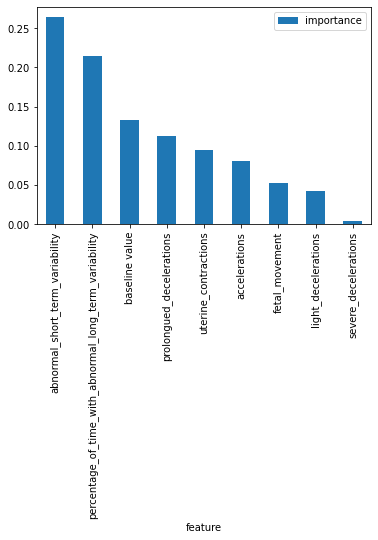

In [476]:
importances.plot.bar()

In [477]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
cf_matrix=confusion_matrix(Y_train, predictions)
cf_matrix

array([[1295,   19,    5],
       [  65,  168,    6],
       [  10,    8,  124]])

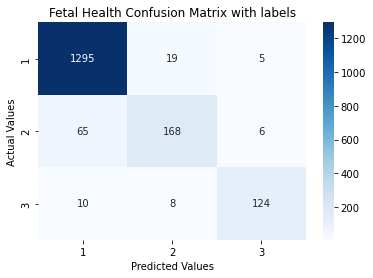

In [478]:
import matplotlib.pyplot as plt
from sklearn import metrics
ax = sns.heatmap(cf_matrix, annot=True, fmt="d", cmap= 'Blues')

ax.set_title('Fetal Health Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([1,2,3])
ax.yaxis.set_ticklabels([1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [479]:
#1,270 fetuses were correctly classified as Normal(true negatives)
#42 (31+11) fetuses were wrongly classified Normal(false positives)
#28 fetuses were wrongly classified as Pathological(false negatives)
#114 fetuses were correctly classified as Pathological(true positives)

In [480]:
#precision and recall
from sklearn.metrics import precision_score, recall_score
#unbalanced dataset, use weighted average
print("Precision:", precision_score(Y_train, predictions, average='weighted'))
#model predicts a fetus health correctly about 91.7% of the time
print("Recall:",recall_score(Y_train, predictions, average='weighted'))
#model predicted the health of 92% of the actual healthy(normal) fetuses.

Precision: 0.9312525251413185
Recall: 0.9335294117647058


In [481]:
#an f-score combines precision and recall into one score
from sklearn.metrics import f1_score

f1_score(Y_train, predictions, average='weighted')

0.9309439158315794

In [603]:
#make predictions
y_pred=random_forest.predict(X_train)
print (random_forest.score(X_train, Y_train))

0.9988235294117647


In [605]:
df=pd. DataFrame({'Actual': Y_train,
'Predicted' :y_pred})
df

,Actual,Predicted
1167,1.0,1.0
1355,1.0,1.0
1662,1.0,1.0
368,2.0,2.0
1535,1.0,1.0
...,...,...
662,2.0,2.0
1020,1.0,1.0
638,1.0,1.0
204,1.0,1.0
